# Report 2: Exploring magnetic ordering using neutron diffraction and investigating curve fitting methods

**Olivia Gough / 170060840 / AP17023**

## INTRODUCTION

*Antiferromagnetism* is the phenomenon where alternate magnetic moments in a solid point in opposite directions.[[1](https://upload.wikimedia.org/wikipedia/commons/5/5d/Antiferromagnetic_ordering.svg)] As a result, the solid has no magnetic moment, making this behaviour a little tricky to observe directly. (This contrasts with *ferromagnetism*, the familiar phenomenon in iron where each magnetic moment has the same direction, and therefore the solid as a whole acts as a magnet.) However, antiferromagnetism increases (often, doubles) the crystallographic unit cell size for radiation beams sensitive to magnetism, such as neutrons. As a result, characteristic peaks are produced in a neutron diffraction pattern.

This ordering typically only happens at very low temperatures, where thermal energy does not disrupt the order. A parameter that characterises this behaviour includes the *transition temperature* or *Neel temperature*, $T_0$, below which the magnetic moments order and remain unaffected by thermal energy. Also, the *critical exponent*, $\beta$, describes how rapidly they order. 

In this mini-project, I will determine these parameters directly from neutron diffraction data collected at ISIS, the UK’s national neutron source, using the integration and curve-fitting skills from recent labs. The material from which these data were collected is a cobalt compound, methylammonium cobalt(II) formate (CH<sub>3</sub>NH<sub>3</sub>Co(HCO<sub>2</sub>)<sub>3</sub>) [[2](http://dx.doi.org/10.1039/C6TC03992H)].

## METHOD 

**Loading and plotting the data...**

We are provided with eight data sets named `data_TTTTT.txt`, where `TTTTT` represents the temperature at which the data were collected. In each data set, the first column is “$d$-spacing”, a common quantity in crystallography, measured in angstrom ($1\,\mathrm{Å}=10^{-10}\,\mathrm{m}$). (from Bragg’s law, $\lambda = 2d\sin\theta$; this is the same $d$, so that it is inversely proportional to the angle $\theta$ through which the neutrons were scattered.) The second column is the diffracted intensity $I$. The portion of the diffraction pattern that is due to magnetic scattering has been selected. 

There is definitely a magnetic phase transition somewhere in the range of temperatures for which we have collected data.

<IPython.core.display.Javascript object>


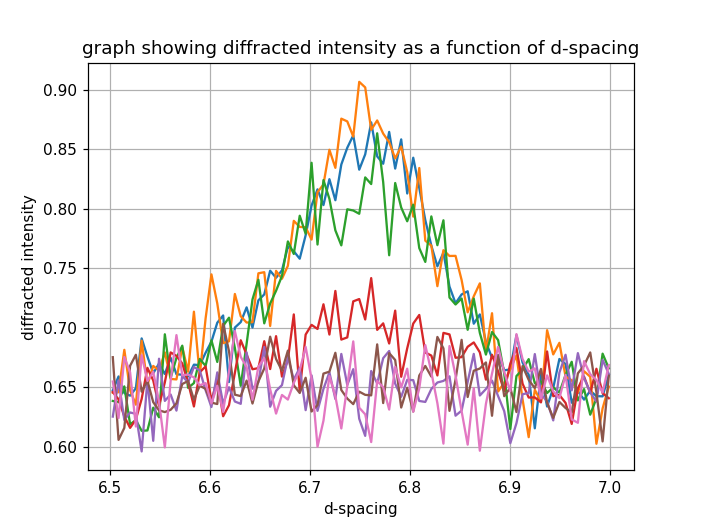

Text(0.5, 1.0, 'graph showing diffracted intensity as a function of d-spacing')

In [13]:
%matplotlib notebook
from numpy import loadtxt
from pylab import plot, legend, figure, title, xlabel, ylabel, grid
# importing relevant modules and functions

data = []
temperature = ["02.0K","05.0K","10.0K","14.0K","20.0K","30.0K","50.0K"]
for i in temperature:
    data.append(loadtxt("project2_data\data_" + i + ".txt"))
# takes all the data and stores it in an Nx2 array

for j in data:
    plot(j[:,0],j[:,1])
xlabel("d-spacing")
ylabel("diffracted intensity")
grid()
title("graph showing diffracted intensity as a function of d-spacing")
# plots graph of data with title and axis labels

Referring to the 1951 paper, by C.G. Shull et al, we see this graph has a similar shape to the data they collected for MnO. By inspection, looking at Fig. 6 of the paper, found on page 8 [[3](https://journals.aps.org/pr/pdf/10.1103/PhysRev.83.333)], we see antiferromagnetic reflection of MnO as obtained at various temperatures. It's worth noting that the peaks broaden as they approach the Curie temperature. The Curie temperature is the temperature above which certain materials lose their permanent magnetic properties, to be replaced by induced magnetism, as discovered by Pierre Curie. The transition temperature, $T_0$, for an antiferromagnetic substance above which it is paramagnetic (analogous to the Curie temperature for ferromagnetics).

**Integrating the data...**<br>

The next step is to integrate the data then plot the integrated magnetic diffraction intensity as a function of temperature. It's worth noting the steps in $d$-spacing are not even so the `trapezoid` function previously written isn't appropriate to use.
Instead, I will use the inbuilt `trapz` function from `numpy` which also uses the trapezoid method for integration.

<IPython.core.display.Javascript object>


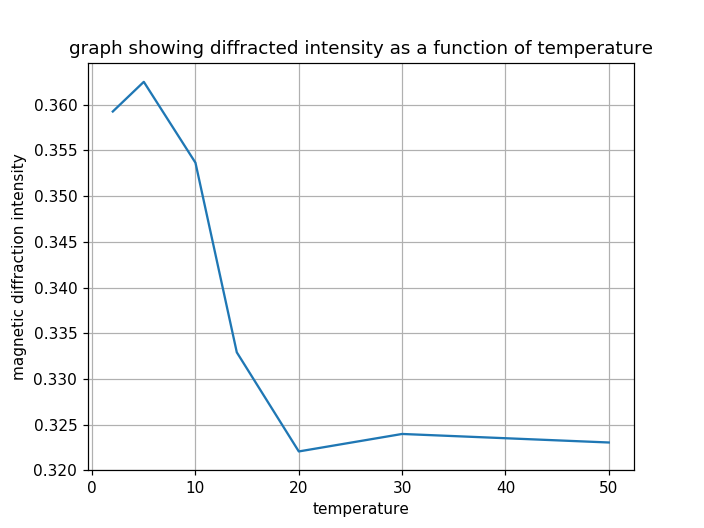

Text(0.5, 1.0, 'graph showing diffracted intensity as a function of temperature')

In [30]:
from numpy import trapz
# importing relevant functions

x = [2,5,10,14,20,30,50]
y = []
# lists of values to be plotted

for i in data:
    y.append(float(trapz(i[:,1],i[:,0])))
# integrates values and then adds them to the list y

plot(x,y)
xlabel("temperature")
ylabel("magnetic diffraction intensity")
grid()
title("graph showing diffracted intensity as a function of temperature")
# plots graph with titles

Again referring to the paper by C.G. Shull, [[3](https://journals.aps.org/pr/pdf/10.1103/PhysRev.83.333)], Fig. 7 shows the graph they obtained intensity as a function of temperature. This looks similar to our data. A sharp
increase is seen to occur as the temperature is lowered, followed by a more gradual approach to a saturation intensity.

**A model for the magnetic signal as a function of temperature...**

The usual functional form to which we fit these data is

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$

This gives the magnetisation $M$ as a function of temperature $T$ with four parameters: the amplitude $A$ of the magnetic signal, the magnetic transition temperature $T_0$, the *critical exponent* $\beta$, and a constant background $B$.

Since we are working with arrays rather than single values of $T$, I will utilise the `where` function from `numpy`, which are in place of basic `if` and `else` statements. It works using these inputs:

  `where(condition, value_if_true, value_if_false)`


In [15]:
%matplotlib notebook
from numpy import where

def M(T, T0, A, beta, B):
    q = where(T<T0, A*((T0-T)**beta)+B, B)
    return q
# the function defined above takes the parameters of the magnetisation 
# then returns magnetism as a function of temp

Now to find the parameters $A$, $T_0$, $\beta$, and $B$. After I've made some initial guesses to get a close fit by hand, I'll then use a curve fitting algorithm to find a better approximation of the actual parameters. <br>
After some trial and error experimenting with different values, the initial guesses of the parameters, $p_0$, I'm using are $A = 0.008$, $T_0 = 15.25$, $\beta = 0.75$ and $B = 0.325$.

<IPython.core.display.Javascript object>


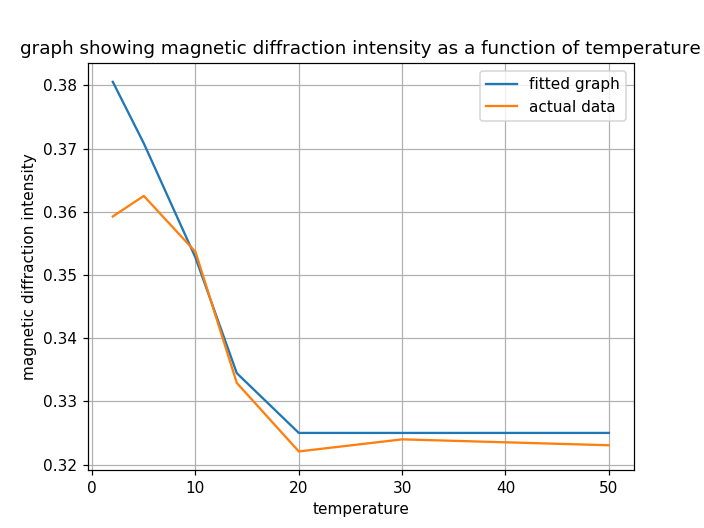

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [16]:
figure()
y_approximation = []

for i in x:
    y_approximation.append(M(i, 15.25, 0.008, 0.75, 0.325))
# adds values to list of y values with guesses at initial parameters
    
plot(x, y_approximation, label = "fitted graph")
plot(x,y, label = "actual data")
xlabel("temperature")
ylabel("magnetic diffraction intensity")
title("graph showing magnetic diffraction intensity as a function of temperature")
legend()
grid()

**Fitting the data using inbuilt function**

There are two ways of fitting the model to the data. This can be done using an inbuilt function from the `scipy.optimize` module; `curve_fit`. Alternatively, I could determine the jacobian of the function and use it with the Newton-Raphson algorithm to find a better fit. I will attempt both methods below and find the critical exponent $\beta$ and magnetic transition temperature $T_0$.

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


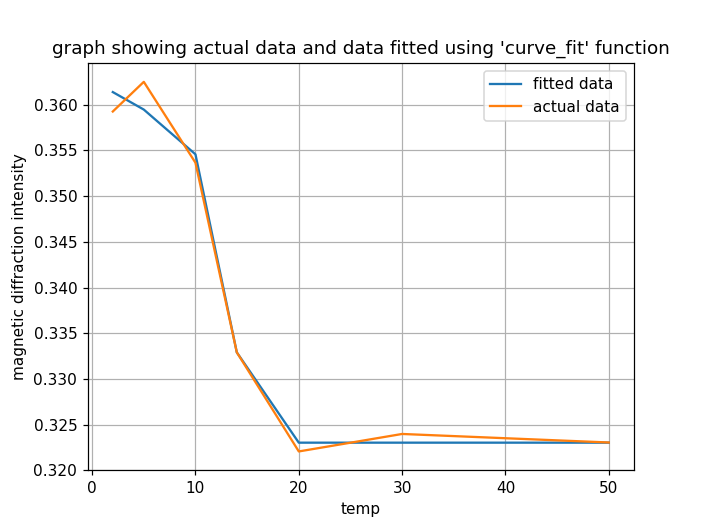

Text(0.5, 1.0, "graph showing actual data and data fitted using 'curve_fit' function")

In [17]:
%matplotlib notebook
from scipy.optimize import curve_fit
from numpy import array

p0 = (15.25, 0.008, 0.75, 0.325)
params, chi = curve_fit(M, x, y, p0)

y_fitted = []
T0, A, beta, B = params
for i in x:
    y_fitted.append(M(i,T0,A,beta,B))
    
plot(x, y_fitted, label = "fitted data")
plot(x,y, label = "actual data")
legend()
grid()
xlabel("temp")
ylabel("magnetic diffraction intensity")
title("graph showing actual data and data fitted using 'curve_fit' function")

In [21]:
print(T0, A, beta, B)

14.005916085811855 0.02463781270053322 0.17809525242880436 0.3230307429914959


The function I have used, `curve_fit` finds the smallest difference between the actual data and fitted data, which will help to find a very close approximation for the parameters we require. The above graph is a lot more accurate than the previous one. From this graph, we can obtain values $\beta$ and $T_0$ by printing out the parameters of fitted data of graph.
We therefore have:<br><br>
$\beta = 0.17810$<br>
$T_0 = 14.006$<br><br>
Where values are given to five significant figures.

**Fitting the data using multidimensional Newton-Raphson**<br>
The alternative method of fitting the model to the data would be using some of the funcions defined in Lab09. First I will define `g` with arguments of the parameters and data, which will return the sum of the partial derivatives of the variables, of the form;<br>
$$
g_j(p_1, p_2, \dots, p_q) = \sum_{i=1}^n\big(f(x_i) - y_i\big)\frac{\partial f}{\partial p_j}(x_i) \qquad 1\leq j \leq q
$$<br>
I will also need a function to calculate the derivatives, so will define `CD`. This is the central difference derivation method which will return the derivative of a function $f$ at a point $x_0$ with step size $h$. This is of the form;<br>
$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$<br>

Thirdly, I will need to define `jacobian`, the code of which was provided in Lab09. [[4](Lab09.ipynb)]  This returns the Jacobian matrix of $g$ evaluated at param, given observed data, using the central difference method to evaluate the derivatives.<br>
$$
\frac{\partial\mathbf{g}}{\partial\mathbf{p}} = \begin{pmatrix}
        \frac{\partial g_1}{\partial p_1} & \frac{\partial g_1}{\partial p_2} & \dots & \frac{\partial g_1}{\partial p_q} \\
        \frac{\partial g_2}{\partial p_1} & \frac{\partial g_2}{\partial p_2} & \dots & \frac{\partial g_2}{\partial p_q} \\
        \vdots & \vdots & \ddots & \vdots \\
        \frac{\partial g_q}{\partial p_1} & \frac{\partial g_q}{\partial p_2} & \dots & \frac{\partial g_q}{\partial p_q} 
      \end{pmatrix}.
$$<br>
Finally, the function defined as `nD_newton_step` finds the inverse of the Jacobian and multiplies it by `g`;<br>
$$
      \mathbf{p}-\left(\frac{\partial\mathbf{g}}{\partial\mathbf{p}}\right)^{-1}\mathbf{g}(\mathbf{p}).
$$
<br><br>
This will return an estimate for the parameters.

In [18]:
import numpy as np

def g(params, data):
    T0, A, beta, B = params
    T, y = data
    T = array(T)
    y = array(y)
    g1 = np.sum(( M ( T, T0, A, beta, B) - y ) * where( T<T0, ((T0 - T)**beta), 0))
    g2 = np.sum(( M ( T, T0, A, beta, B) - y ) * where( T<T0, (A * beta * ((T0 - T)**beta-1)), 0))
    g3 = np.sum(( M ( T, T0, A, beta, B) - y ) * where( T<T0, (A * ((T0 - T)**beta) * np.log(T0 - T)), 0))
    g4 = np.sum(( M ( T, T0, A, beta, B) - y ))
    return g1, g2, g3, g4

In [19]:
def CD(f, x0, h):
    return (f(x0 + h/2) - f(x0 - h/2))/np.linalg.norm(h)

In [20]:
def jacobian(g, param, data):
    p = np.array(param)
    delta = 1e-6
    N = len(param)
    T0, A, beta, B = param
    jac = np.zeros((N,N))
    for i in range(N):
        def g_i(x):
            return g(x, data)[i]
        for j in range(N):
            dv = np.zeros(N)
            dv[j] = delta
            jac[i,j] = CD(g_i, (T0, A, beta, B), dv)
    return jac

In [21]:
def nD_newton_step(g, p, data):
    T0, A, beta, B = p
    return p - (np.linalg.inv(jacobian(g, (T0, A, beta, B), data)) @ g(p, data))

Now I want to find where the parameters converge; where the difference between them is less than $10^-6$.

In [22]:
p0 = (15.25, 0.008, 0.75, 0.325)
converged = False
while not converged:
    p1 = nD_newton_step(g, (T0, A, beta, B), (x, y))
    if np.linalg.norm(p1 - p0) < 1e-6:
        converged = True
        print(p1)
    else:
        p0 = p1
        T0, A, beta, B = p0

[14.00515083  0.02478691  0.17521309  0.32303448]


J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


The above code printed new estimates for the parameters and stores them in a list; <br>
$T_0 = 14.005$; magnetic transition temperature,<br>
$\beta = 0.17521$; critical exponent,<br>
$A = 0.024787$; amplitude of magnetic signal, and finally<br>
$B = 0.32303$; constant background.<br>
Figures given to five significant figures.<br><br>
Below I will plot the list vs the real data to see how well the fit has worked.

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


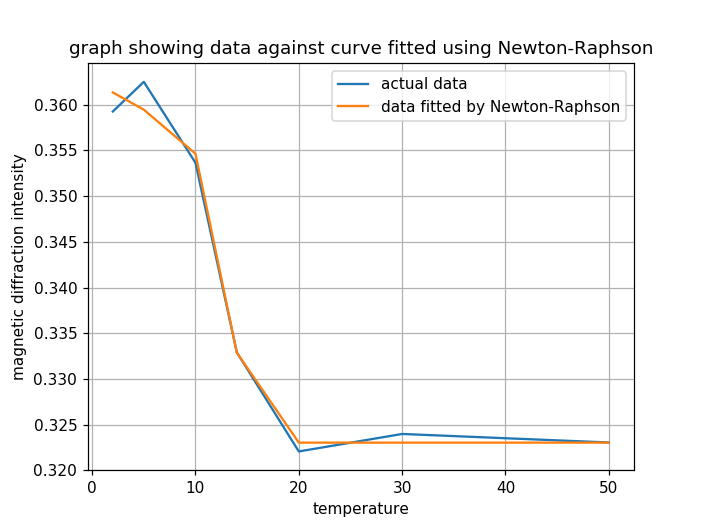

In [23]:
%matplotlib notebook
T0, A, beta, B = p1
y_NR = []
for i in x:
    y_NR.append(M(i, T0, A, beta, B))
    
plot(x, y, label = "actual data")
plot(x, y_NR, label = "data fitted by Newton-Raphson")
xlabel("temperature")
ylabel("magnetic diffraction intensity")
title("graph showing data against curve fitted using Newton-Raphson")
legend()
grid()

This graph, just from inspection by eye, appears to have worked to a similar level of accuracy as the inbuilt `curve_fit` function with the same initial parameters $p_0$. They both returned very similar values of $\beta$ and $T_0$, with $T_0$ having just $0.0071$ percentage difference between two values found by respective methods.

# DISCUSSION AND FURTHER EXPLORATION

I will now consider a few different questions that see how effective both fitting models are when some conditions are changed. I'll try both methods with some initial guesses relatively far away from their actual values and also see how the functions react when given noisy data.

**Sensitivity to noise**<br><br>
I will add some anomalous points to the data and see how both methods cope with this, keeping the inital guess of the parameters the same, $p_0$. Firstly, I will see how the `curve_fit` functions responds.

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


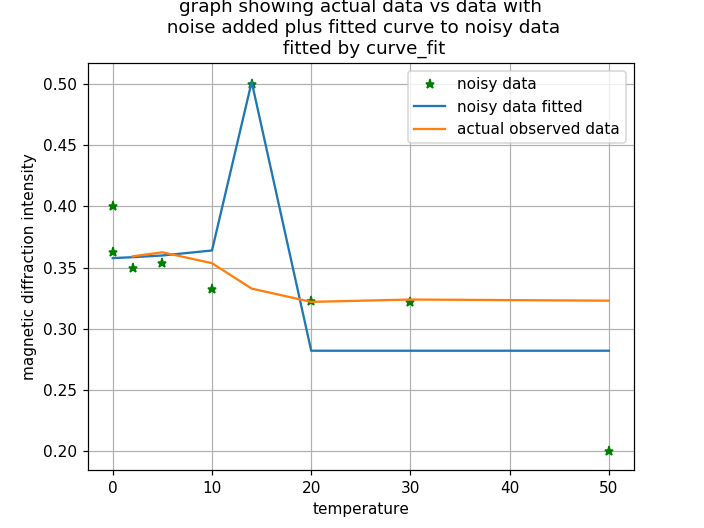

In [24]:
%matplotlib notebook

x_anomalous = x + [0] + [0]
y_anomalous = y + [0.4] + [0.2]

x_anomalous = np.sort(x_anomalous)
y_anomalous = sorted(y_anomalous, reverse = True)
# added values to arrays of x and y then sorts them into ascending and descending order respectively

y_anomalous[5] = 0.5
y_anomalous[2] = 0.35
# changes values in y array

param_anomalous, chi = curve_fit(M, x_anomalous, y_anomalous, p0)
y_anomalous_fitted = []
T0, A, beta, B = param_anomalous

for i in x_anomalous:
    y_anomalous_fitted.append(M(i, T0, A, beta, B))
plot(x_anomalous, y_anomalous, "g*", label = "noisy data")
plot(x_anomalous, y_anomalous_fitted, label = "noisy data fitted")
plot(x, y, label = "actual observed data")
xlabel("temperature")
ylabel("magnetic diffraction intensity")
title("graph showing actual data vs data with\n noise added plus fitted curve to noisy data\n fitted by curve_fit")
grid()
legend()

Upon trying various different anomalous points, I found that changing the temperature values didn't affect the fit of the data very much, if at  all. However, adding false values for magnetic diffraction intensity changed the fit of the graph greatly. The larger the false values were the more inaccurate the graph became, as you'd expect. I would say adding noisy data made the graph inaccurate and think it is relatively sensitive.<br><br>
I will now test to see how the Newton-Raphson fitting responds to data with noise, again using same initial parameter guesses, $p_0$.

[14.00515083  0.02478691  0.17521309  0.32303448]


J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


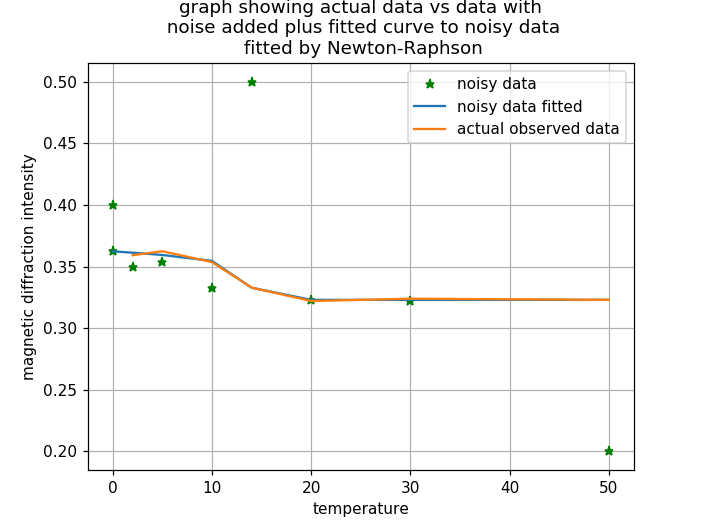

In [25]:
%matplotlib notebook

p_anom = array(p0)

T0, A, beta, B = p_anom
converged = False
while not converged:
    p_anom1 = nD_newton_step(g, (T0, A, beta, B), (x,y))
    if np.linalg.norm(p_anom1 - p_anom) < 1e-6:
        converged = True
        print(p_anom1)
    else:
        p_anom = p_anom1
        T0, A, beta, B = p_anom

T0, A, beta, B = p_anom1

y_anom_fitted_NR = []

for i in x_anomalous:
    y_anom_fitted_NR.append(M(i, T0, A, beta, B))
plot(x_anomalous, y_anomalous, "g*", label = "noisy data")
plot(x_anomalous, y_anom_fitted_NR, label = "noisy data fitted")
plot(x, y, label = "actual observed data")
xlabel("temperature")
ylabel("magnetic diffraction intensity")
title("graph showing actual data vs data with\n noise added plus fitted curve to noisy data\n fitted by Newton-Raphson")
grid()
legend()

Given the same noisy data, the `nD_newton_step` function performed significantly better than the `curve_fit`. After testing various anomalous values on both axes, none of them seemed to significantly change the fit of the graph. I would definitely say the Newton-Raphson is the more effective fitting model given noisy data.

**Sensitivity to initial parameter guesses**<br><br>
I will now investigate how changing the initial parameters affect the fit of the data. When plotting the Newton-Raphson method, it took a lot of trial and error to find initial guesses to yield a good fit so I predict this condition will definitely have a big impact when using `nD_newton_step`. First, I will investigate the impact on `curve_fit`.

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


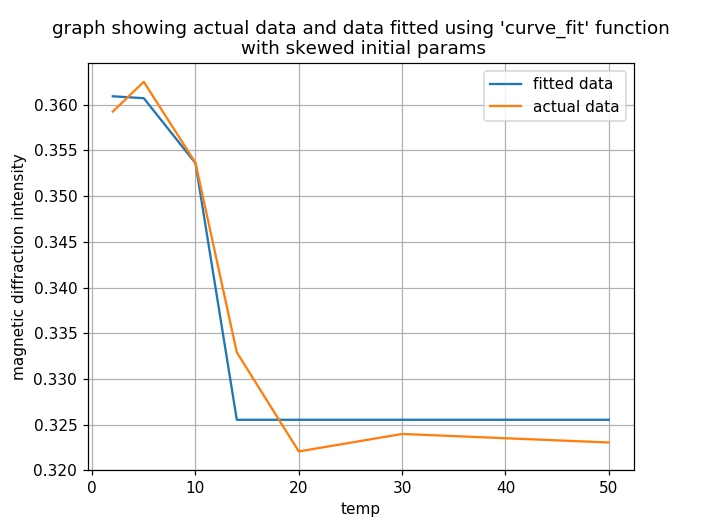

Text(0.5, 1.0, "graph showing actual data and data fitted using 'curve_fit' function\n with skewed initial params")

In [26]:
%matplotlib notebook
from scipy.optimize import curve_fit
from numpy import array

p_test = (20, 0.04, 1, 0.5)
params, chi = curve_fit(M, x, y, p_test)

y_fitted_test = []
T0, A, beta, B = params
for i in x:
    y_fitted_test.append(M(i,T0,A,beta,B))
    
plot(x, y_fitted_test, label = "fitted data")
plot(x,y, label = "actual data")
legend()
grid()
xlabel("temp")
ylabel("magnetic diffraction intensity")
title("graph showing actual data and data fitted using 'curve_fit' function\n with skewed initial params")

The `curve_fit` function responded extremely well when the initial parameter conditions were changed. The data was still fit really well and I couldn't find any values that significantly changed the fit of the graph. I could change the initial parameters large amounts and the graph didn't change much; although I did receive an optimisation error when entering relatively very large values.<br>Now I will do the same kind of test for `nD_newton_step`.

<IPython.core.display.Javascript object>


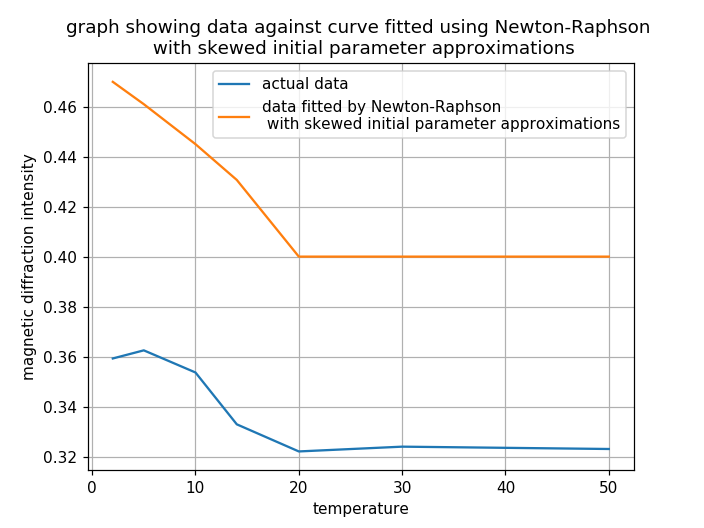

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [27]:
%matplotlib notebook
#p0 = (15.25, 0.008, 0.75, 0.325) for reference
T0, A, beta, B = p1
y_NR_test = []
for i in x:
    y_NR_test.append(M(i, 20, 0.008, 0.75, 0.4))
    
plot(x, y, label = "actual data")
plot(x, y_NR_test, label = "data fitted by Newton-Raphson\n with skewed initial parameter approximations")
xlabel("temperature")
ylabel("magnetic diffraction intensity")
title("graph showing data against curve fitted using Newton-Raphson \n with skewed initial parameter approximations")
legend()
grid()

As expected, the `nD_newton_step` was extremely sensitive to the initial parameters being changed. Changing any of the parameters altered the fit of the graph significantly. <br>
In conclusion to this section, I think if you didn't have a good approximation of the parameters to start with, I would choose the `curve_fit` function to fit data, or be willing to experiment with different values to use `nD_newton_step`.

# CONCLUSION

To conclude, I will summarize the findings of this report. After plotting the data, then integrating it and fitting it, I used two different methods to fit the data and investigated different ways the fit of the data could be affected. I wanted to see how adding some anomalous values to the data would impact the graphs as well as trying out different initial parameters that the magnetisation $M$ relied upon.<br><br>

*Which function gave a better fit of the data?*<br>
By visually inspecting both the graphs of the intensity against temperature with data fitted, I would say both the inbuilt `curve_fit` function and the handwritten `nD_newton_step` produced really nicely fitted graphs. Visually, I can't say which one performed better, with both appearing to be very accurate.<br><br>

*How sensitive were the functions to noisy data?*<br>
To test this out, I added some anomalous values to the sets of data. The `curve_fit` didn't handle this noisy data well at all, with the graph becoming very badly skewed with any changing $y$ values. The more noisy the data, the more skewed the fit became and I wouldn't rely upon `curve_fit` if I knew my data has noise in it after this investigation. On the other hand, the `nD_newton_step` handled anomalous data points extremely well. Given some very noisy data the function visually fit the graph very close to the actual data. The Newton-Raphson method is definitely better equipped to handle erroneous data.<br><br>

*What happened when initial parameters were changed?*<br>
To fit the data nicely, the parameters, $p_0$ I used were $T_0 = 15.25$, $A = 0.008$, $\beta = 0.75$ and $B = 0.325$. This took a lot of trial and error to get a good fit by hand but once the graph seemed to visually look like a good approximate fit, both functions returned their estimation for the parameters.<br><br> 

For `curve_fit` the improved parameter approximations given were:<br>
$T_0 = 14.006$<br>
$A = 0.024638$<br>
$\beta = 0.17810$<br>
$B = 0.32303$<br><br>

For `nD_newton_step` the improved parameter approximations given were:<br>
$T_0 = 14.005$<br>
$A = 0.024788$<br>
$\beta = 0.17521$<br>
$B = 0.32303$<br><br>
The values are all given to 5 significant figures are all agree with each other to a good level. When the $p_0$ starting parameters were changed, this changed the fits of the graphs for both functions. For `curve_fit`, the shape of the graph wasn't affected badly. It remained the correct shape and the fit stayed reasonably okay. However, for the `nD_newton_step` it didn't handle the change well at all. The fit of the curve to the actual data was completely out. Given the same initial parameters, `curve_fit` definitely coped better if there parameters were far away from their actual values.<br>The actual literary value for transition temperature, or *Neel* temperature for this particular cobalt compound is 15.7K [[2](http://dx.doi.org/10.1039/C6TC03992H)], which is somewhat correlated with the values I have found of 14.01K. With ~10% error, I would say this is a strong method for approximating $T_0$ from a given set of data.<br><br>
*Closing thoughts*<br>
I think a good approach for plotting data in a real world situation would be to combine both functions, as they both have benefits and strengths of their own. For finding initial parameters, `curve_fit` would be the more powerful function if you couldn't make a good estimate. However, `nD_newton_step` would provide a better fit with noisy data, so is worth trying both of them out. Both functions found the transition temperature $T_0$ to be 14.01K (to 2 decimal places) and the critical exponent $\beta$ to be 0.18 (to 2 decimal places).

# REFERENCES

[[1](https://upload.wikimedia.org/wikipedia/commons/5/5d/Antiferromagnetic_ordering.svg)] Antiferromagnetism : **Wikipedia**<br>
[[2](http://dx.doi.org/10.1039/C6TC03992H)] : Magnetic transitions and isotropic versus anisotropic magnetic behaviour of [CH3NH3][M(HCOO)3] M = Mn2+, Co2+, Ni2+, Cu2+ metal–organic perovskites, **B. Pato-Doldan et al**<br>
[[3](https://journals.aps.org/pr/pdf/10.1103/PhysRev.83.333)] : Neutron Diffraction by Paramagnetic and Antiferromagnetic Substances, **C.G. Shull et al**, pages 7 - 8<br>
[[4](Lab09.ipynb)] : Lab09 script, **C. Agnor**<br>

In [32]:
import io
from IPython.nbformat import current
filepath = "project2.ipynb"
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

2291
